In [1]:
def crop(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    contours_min_0 = np.argmin(contours[0], axis=0)
    contours_max_0 = np.argmax(contours[0], axis=0)

    x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
    y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
    x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
    y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    # contour[1]의 x,y min,max
    contours_min_1 = np.argmin(contours[1], axis=0)
    contours_max_1 = np.argmax(contours[1], axis=0)

    x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
    y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
    x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
    y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
    
    # --------------------------------------------------------
    
    if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
        x_Min = x_Min_0    # x_Min_0이 min값 
    else :
        x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

    if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
        x_Max = x_Max_0    # x_Max_0이 max값 
    else :
        x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

    if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
        y_Min = y_Min_0    # y_Min_0이 min값 
    else :
        y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


    if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
        y_Max = y_Max_0    # y_Max_0이 max값 
    else :
        y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
    
    img_trim = img[y_Min:y_Max, x_Min:x_Max]
    
    return img_trim

In [4]:
from matplotlib import pyplot as plt
import cv2

In [6]:
%pwd

'C:\\Dev\\IMAGE\\face_points\\nb'

In [15]:
img = cv2.imread('AA.png')

(576, 864, 3)

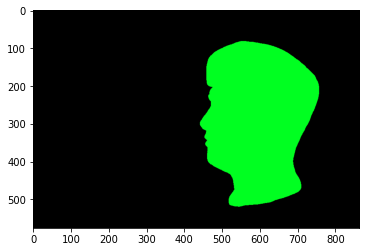

In [17]:
plt.imshow(img)
img.shape

In [18]:
plt.imread('AA.png')

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [20]:
blue = (255, 0, 0)
green= (0, 255, 0)
red= (0, 0, 255)
white= (255, 255, 255) 



In [71]:
colors = [blue, green,white]

In [22]:
for color in range(len(colors)):
    print(color)

0
1
2
3


In [61]:
import pandas as pd
A = pd.read_csv('test_img_point.csv')
print(A)

     number    x    y
0         0  516  705
1         1  513  623
2         2  516  648
3         3  492  540
4         4  513  597
..      ...  ...  ...
463     463  577  475
464     464  563  482
465     465  555  487
466     466  694  460
467     467  706  452

[468 rows x 3 columns]


In [76]:
len(A)

468

In [84]:
color = colors * 156

In [85]:
len(color)

468

In [86]:
while True:
    for i, (x,y,color) in enumerate(zip(A['x'],A['y'],color)):
        print(i , x, y, color)
    if i == 155:
        break
    else:
        i += 1
    

0 516 705 (255, 0, 0)
1 513 623 (0, 255, 0)
2 516 648 (255, 255, 255)
3 492 540 (255, 0, 0)
4 513 597 (0, 255, 0)
5 512 564 (255, 255, 255)
6 513 483 (255, 0, 0)
7 339 474 (0, 255, 0)
8 513 422 (255, 255, 255)
9 512 390 (255, 0, 0)
10 511 289 (0, 255, 0)
11 517 718 (255, 255, 255)
12 517 728 (255, 0, 0)
13 517 734 (0, 255, 0)
14 518 749 (255, 255, 255)
15 519 761 (255, 0, 0)
16 519 776 (0, 255, 0)
17 519 791 (255, 255, 255)
18 520 813 (255, 0, 0)
19 514 635 (0, 255, 0)
20 495 634 (255, 255, 255)
21 255 395 (255, 0, 0)
22 410 497 (0, 255, 0)
23 385 499 (255, 255, 255)
24 362 499 (255, 0, 0)
25 331 485 (0, 255, 0)
26 431 491 (255, 255, 255)
27 376 434 (255, 0, 0)
28 402 435 (0, 255, 0)
29 351 437 (255, 255, 255)
30 335 446 (255, 0, 0)
31 312 504 (0, 255, 0)
32 428 846 (255, 255, 255)
33 330 468 (255, 0, 0)
34 243 495 (0, 255, 0)
35 285 486 (255, 255, 255)
36 397 604 (255, 0, 0)
37 489 703 (0, 255, 0)
38 496 730 (255, 255, 255)
39 463 713 (255, 0, 0)
40 448 727 (0, 255, 0)
41 478 733 (255

TypeError: 'int' object is not iterable

In [74]:
len(A['x'])

468